In [31]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
data = pd.read_csv('StudentsPerformance.csv')

In [15]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
data['gender']

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [17]:
type(data['gender'])

pandas.core.series.Series

In [19]:
data[5:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [22]:
data.iloc[5]

gender                                     female
race/ethnicity                            group B
parental level of education    associate's degree
lunch                                    standard
test preparation course                      none
math score                                     71
reading score                                  83
writing score                                  78
Name: 5, dtype: object

In [24]:
data.sort_values(by='math score', ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


## Data Lookup

In [25]:
data.shape

(1000, 8)

In [26]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [37]:
descr = data.describe()

In [38]:
descr

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [43]:
descr.to_excel('performance_describtion.xlsx')

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>]], dtype=object)

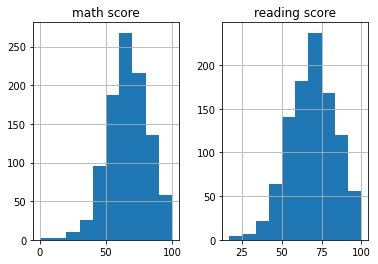

In [33]:
data[['math score', 'reading score']].hist()

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

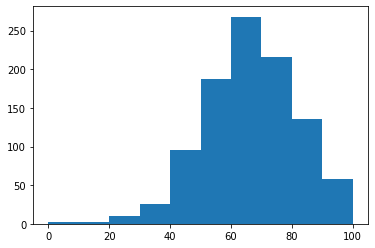

In [34]:
plt.hist(data['math score'])

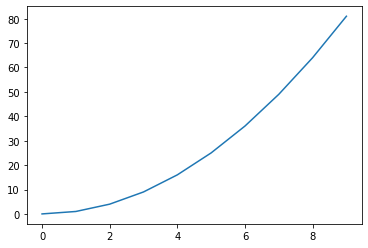

In [36]:
nums = list(range(10))
plt.plot(nums, [x**2 for x in nums])

In [45]:
pd.read_excel('performance_describtion.xlsx', index_col=0)

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


У кого больше балл по математике? У мальчиков или девочек

In [50]:
data[data['gender'] == 'female'].describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [51]:
data[data['gender'] == 'male'].describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


In [52]:
fem_data = data[data['gender'] == 'female']

In [60]:
round(fem_data[fem_data['math score'] > 50].shape[0]/fem_data.shape[0], 3)

0.813

In [63]:
data.groupby('gender')['gender'].aggr(['mean'])

AttributeError: 'SeriesGroupBy' object has no attribute 'aggr'